# Esercizio 10: TSP con Simulated Annealing e Calcolo Parallelo

## Simulated Annealing
Consideriamo un unico cammino chiuso. Questo viene fatto evolvere proponendo mutazioni random con accettazione in stile Metropolis, dove la funzione costo energetico è data dalla lunghezza $L^2$ del percorso. La temperatura parte da due volte la lunghezza del cammino. Così si ottiene la giusta scala senza dover cercare "a mano". La temperatura viene riscalata di un fattore 0.9 ogni temp_size step Monte Carlo. temp_size è modificabile in `input.dat`. In questi risultati, vale 1000.

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.style

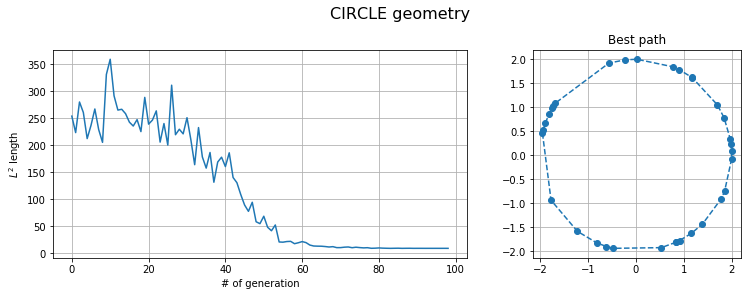

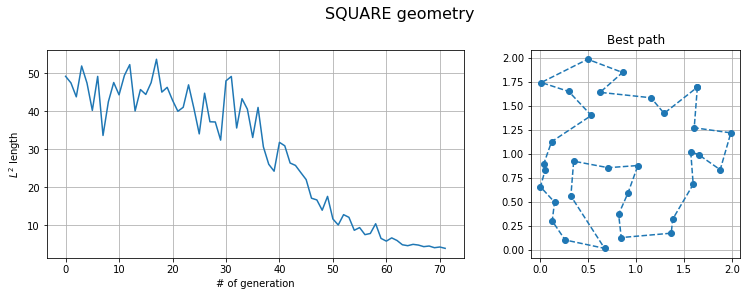

In [2]:
modes = ['CIRCLE', 'SQUARE']
for i_mode, mode in enumerate(modes):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(11,4), gridspec_kw={'width_ratios': [1.3, 1]})
    fig.suptitle(mode + ' geometry', fontsize = 16)
    length = np.loadtxt('exe10-1/' + mode + "_length.dat")
    axs[0].plot(range(length.size), length)
    axs[0].set_xlabel('# of generation')
    axs[0].set_ylabel('$L^2$ length')
    axs[0].grid()
    
    X, Y = np.loadtxt('exe10-1/' + mode + '_best_path.dat', unpack=True)
    axs[1].set_title('Best path')
    axs[1].plot(X, Y, '--o')
    axs[1].set_aspect('equal')
    axs[1].grid()


plt.show()


## Calcolo Parallelo
Facendo uso della libreria MPI, ho parallelizzato l'algoritmo genetico per la risoluzione del TSP. 

Le città vengono generate dal core 0 e condivise tramite B_Cast a tutti gli altri core. Il generatore di numeri random di ciascun core è inizializzato con numeri diversi. Le simulazioni sui core procedono in parallelo. Ogni 10 generazioni, i core, a coppie, si scambiano il migliore individuo della popolazione. Questo migliora l'ergodicità della ricerca del minimo perchè a parità (circa) di tempo, si quadruplicano i cammini su cui viene effettuata la ricerca.

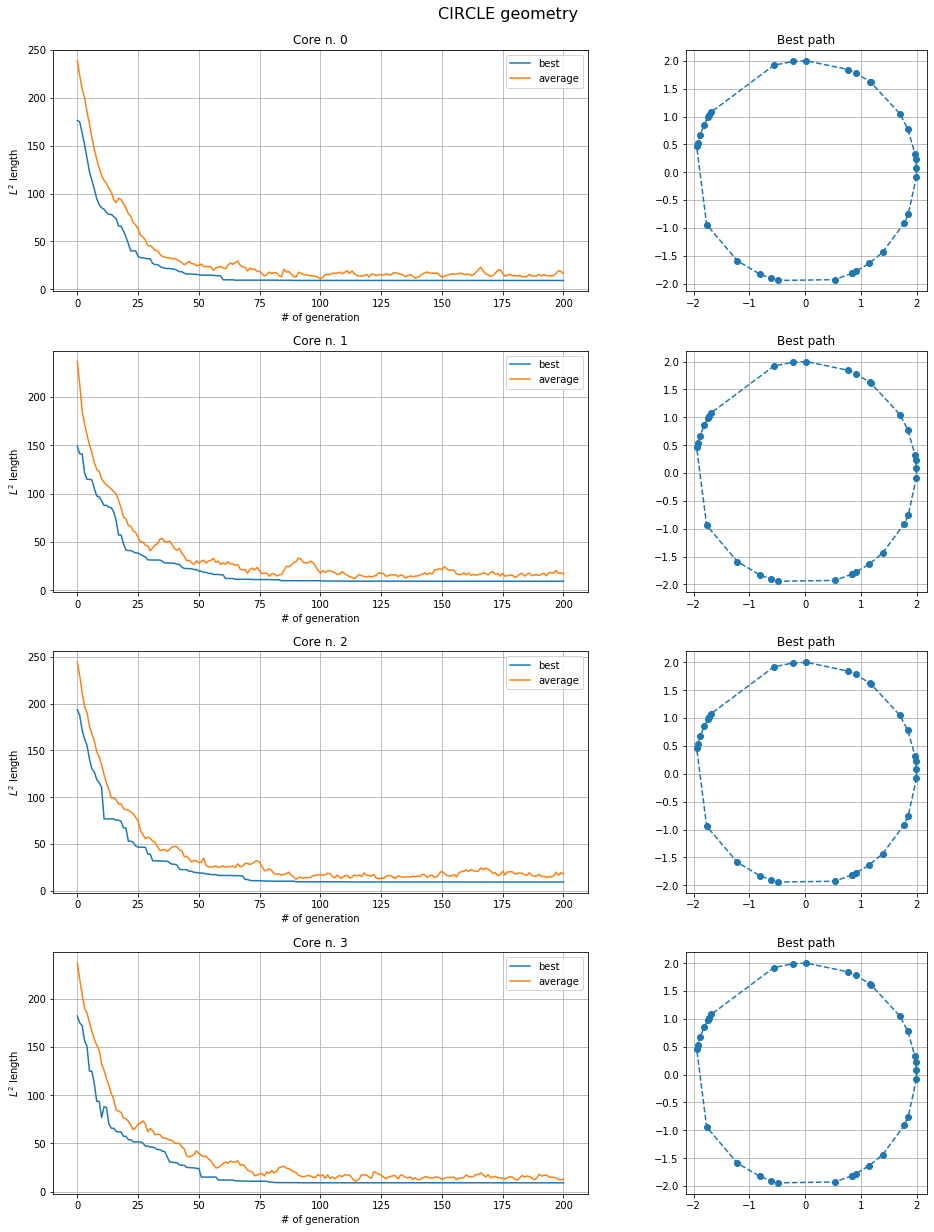

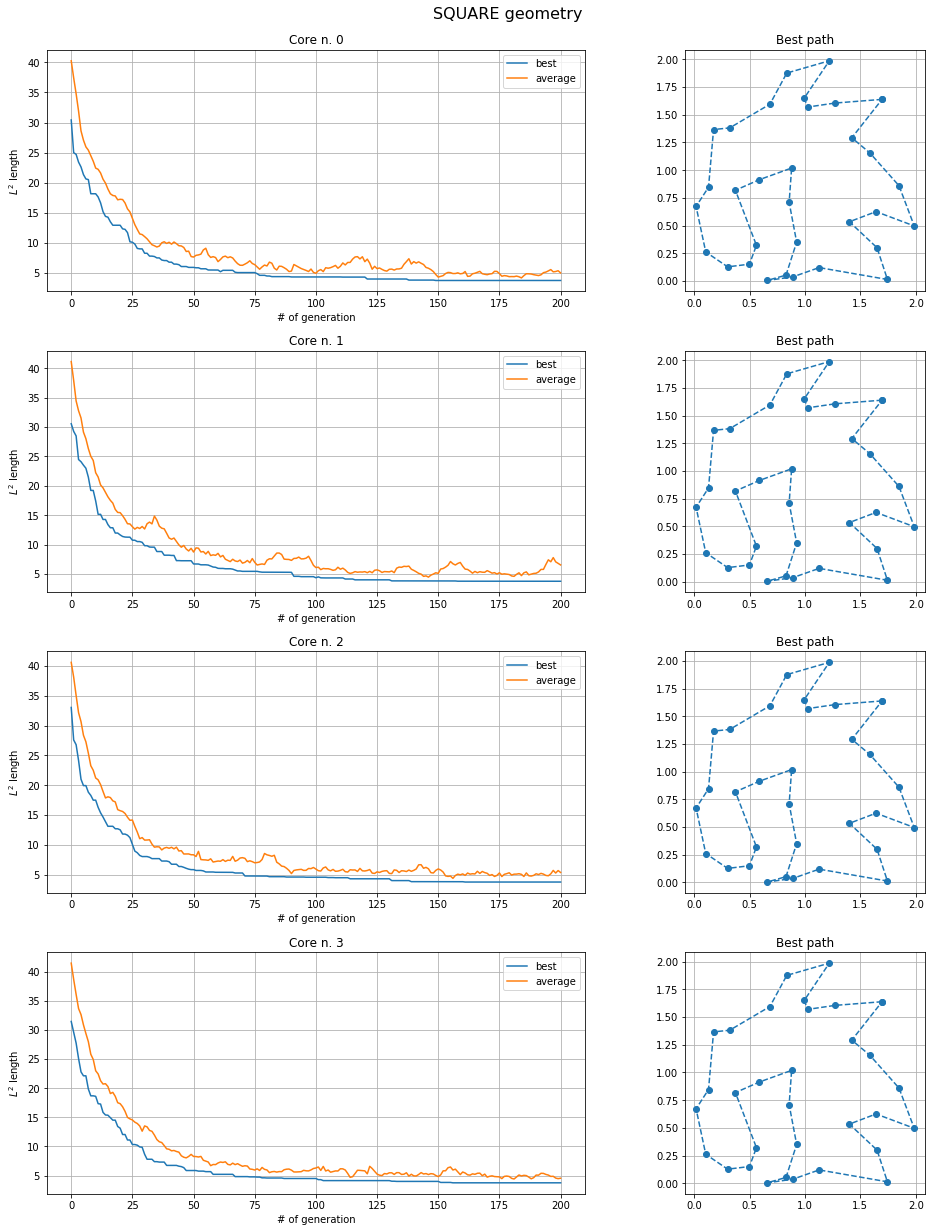

In [3]:
modes = ['CIRCLE', 'SQUARE']
for i_mode, mode in enumerate(modes):
    fig, axs = plt.subplots(4,2, constrained_layout=True, figsize=(14,17), gridspec_kw={'width_ratios': [1.3, 1]})
    fig.suptitle(mode + ' geometry', fontsize=16)
    for icore in range(4):
        best_len, ave_len = np.loadtxt('exe10-2/' + mode + str(icore) + "_len_best_ave.dat", unpack=True)
        ax = axs[icore][0]
        ax.set_title('Core n. ' + str(icore))
        axs[icore][0].plot(range(best_len.size), best_len, label='best')
        axs[icore][0].plot(range(ave_len.size), ave_len, label='average')
        axs[icore][0].set_xlabel('# of generation')
        axs[icore][0].set_ylabel('$L^2$ length')
        axs[icore][0].legend()
        axs[icore][0].grid()
        
        X, Y = np.loadtxt('exe10-2/' + mode + str(icore) + '_best_path.dat', unpack=True)
        axs[icore][1].set_title('Best path')
        axs[icore][1].plot(X, Y, '--o')
        axs[icore][1].set_aspect('equal')
        axs[icore][1].grid()

plt.show()